# Лабораторная работа № 3 на питоне

## Подготовка к работе

#### Если работаете не в Google Collab, то нужно подгрузить следующие библиотеки:


In [ ]:
# pip install openpyxl
# pip install seaborn
# pip install xlrd

#### Импортирование библиотек

In [2]:
import pandas as pd #специальные структуры данных и операции для манипулирования числовыми таблицами
import numpy as np #добавляет поддержку больших многомерных массивов и матриц
import matplotlib.pyplot as plt #библиотека для построения научных графиков
import scipy.stats as sts #все функции статистики
import seaborn as sns #библиотека для создания статистических графиков на Python
import numpy.linalg as nl #реализует операции линейной алгебры
%matplotlib inline
# %matplotlib inline нужен для визуализации статических графиков matplotlib в Jupyter Notebook

## Перечисление признаков
### Названия переменных должны быть такими же, как в Excel !!!

In [3]:
features = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9'] #должны быть с таким же названием как в экселе
f_len = len(features) #измеряется длина списка - количество признаков

## Загрузка Excel-файла
### Подставь свои значения в метод read_excel - имя эксель-файла и название нужного листа !!!

In [4]:
# подставь свои значения! - имя эксель-файла и названия листа
data = pd.read_excel("norm_data.xlsx", engine='openpyxl', index_col=0).loc[:, features]
data.columns=features #задаются названия колонок
X = data.values # таблица всех значений
data.head() #просмотр первых n строк фрейма данных pandas

,X1,X2,X3,X4,X5,X6,X7,X8,X9
Регион,,,,,,,,,
Алтайский край,0.423721,0.439726,-0.646954,1.676521,0.920458,-0.832257,0.922800,-0.626353,0.089137
Амурская область,1.932733,1.687317,0.722511,0.050502,1.192731,0.517564,0.966786,0.206284,-0.368074
Архангельская область без автономного ок,-0.667681,0.589500,1.640880,-0.664946,0.235605,0.155037,0.652055,0.095233,-0.498706
Астраханская область,0.097353,-0.503612,-0.666108,-0.274702,-0.707612,-0.359749,-0.375588,-0.576026,0.565010
Белгородская область,-0.923862,-0.523216,-0.730266,-0.534865,1.825977,-0.222914,-0.842681,-0.039178,0.723634


### Нормировка

## Нахождение корреляционной матрицы

In [5]:
print("Корреляционная матрица:")
correlation = data.corr() #корреляционная матрица
correlation

Корреляционная матрица:


,X1,X2,X3,X4,X5,X6,X7,X8,X9
X1,1.000000,0.424649,0.231616,-0.162421,0.255123,-0.179811,0.325123,-0.275671,-0.025242
X2,0.424649,1.000000,0.594993,0.021442,0.381429,0.196778,0.612704,0.061868,-0.236869
X3,0.231616,0.594993,1.000000,0.004660,0.140411,0.371633,0.472637,0.483304,-0.343512
X4,-0.162421,0.021442,0.004660,1.000000,-0.127318,-0.131076,0.058640,-0.107069,-0.057333
X5,0.255123,0.381429,0.140411,-0.127318,1.000000,0.165129,0.289761,-0.011878,-0.018994
X6,-0.179811,0.196778,0.371633,-0.131076,0.165129,1.000000,0.452447,0.750230,-0.322548
X7,0.325123,0.612704,0.472637,0.058640,0.289761,0.452447,1.000000,0.138288,-0.360360
X8,-0.275671,0.061868,0.483304,-0.107069,-0.011878,0.750230,0.138288,1.000000,-0.185402
X9,-0.025242,-0.236869,-0.343512,-0.057333,-0.018994,-0.322548,-0.360360,-0.185402,1.000000


#### Корреляционная матрица в виде тепловой карты

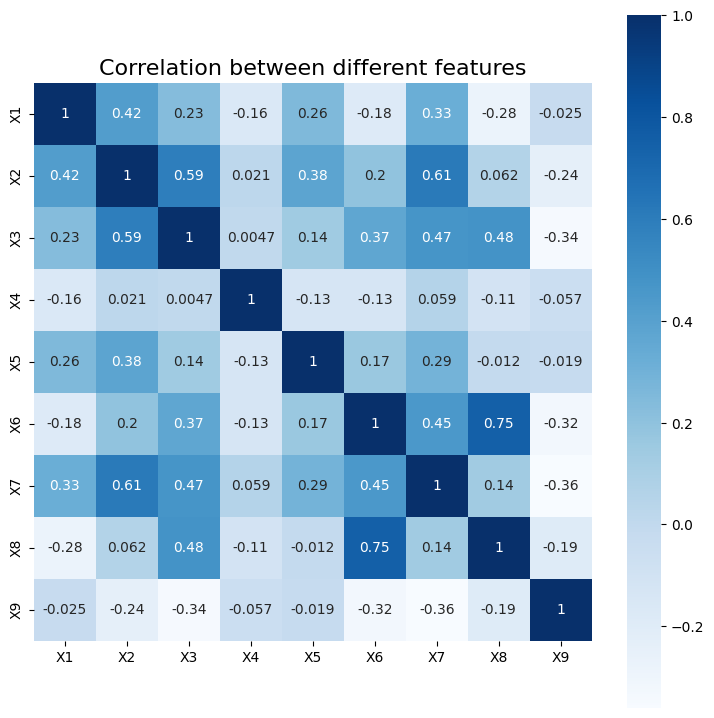

In [6]:
plt.figure(figsize=(9,9)) #создали область Figure
sns.heatmap(correlation, vmax=1, square=True, annot=True,cmap='Blues')
#heatmap - тепловая карта; vmax - значения для привязки цветовой карты
plt.title('Correlation between different features',fontsize=16) #заголовок тепловой карты
plt.show()

## Гипотеза о незначимости корреляционной матрицы

### Расчет оценок собственных чисел корреляционной матрицы

In [7]:
#проверка гипотезы о незначимости корреляционной матрицы
eigenvalues, eigenvector = np.linalg.eig(correlation) #вычисляет собственные числа (значения) и собственные векторы корреляционной матрицы
couple_lst = []
for i in range(len(eigenvalues)):
    couple_lst.append((eigenvalues[i], eigenvector[:, i])) #добавляет в конец списка значения по одиночке

couple_lst = sorted(couple_lst, key=lambda x: x[0], reverse=True)
#key (необязательный параметр): если указать ключ, то сортировка будет выполнена по функции этого ключа
#reverse: по умолчанию сортировка выполняется по возрастанию. Указано reverse=True, т.к. сортируем по убыванию
eigenvalues_sorted = sorted(eigenvalues, reverse=True)
print("Оценки собственных чисел корреляционной матрицы:")
eigenvalues_sorted
# couple_lst

Оценки собственных чисел корреляционной матрицы:


[3.0423031750716003,
 1.8635905056782158,
 1.1753850955619165,
 0.8419697012970508,
 0.7586466266512575,
 0.5380705734452834,
 0.413989585342517,
 0.2460871222140263,
 0.11995761473814125]

### Проверка гипотезы

In [8]:
import math #math предоставляет доступ к некоторым популярным математическим функциям и константам

def chi_2(n, k, R):
    return -(n-1/6*(2*k+11))*math.log(np.linalg.det(R))
#формула статистики Хи^2; math.log (x) используется для вычисления натурального логарифмического значения
#np.linalg.det(R) вычисление определителя заданного квадратного массива k – число факторов; n – объем выборки
chi2_z = chi_2(data.shape[0], data.shape[1], correlation) # .shape - это кортеж размеров массива
p_value =sts.chi2.sf(chi2_z, data.shape[1]* (data.shape[1]-1) / 2) #значение p-value
print("Статистика критерия: ", chi2_z)
print("Достигаемый уровень значимости (p-value): ", p_value)
if p_value > 0.05:
    print("p-value > 0,05 - Гипотеза принимается, матрица парных коэффициентов корреляции незначима.")
else:
    print('p-value < 0,05 - Гипотеза отклоняется, матрица парных коэффициентов корреляции значима.')

Статистика критерия:  286.6664774208767
Достигаемый уровень значимости (p-value):  8.172772064739315e-41
p-value < 0,05 - Гипотеза отклоняется, матрица парных коэффициентов корреляции значима.


## Построение доверительных интервалов

In [9]:
#доверительные интервалы
def eigenval_left(l, n):
    return l / (1 + sts.norm.ppf(0.975) * math.sqrt(2/(n-1))) #sts.norm.ppf квантиль

def eigenval_right(l, n):
    return  l / (1 - sts.norm.ppf(0.975) * math.sqrt(2/(n-1)))

conf_interval = np.empty((f_len, 3))
#f_len - кол-во признаков; возвращает массив заданной размерности, но без инициализации его значений
for i in range(conf_interval.shape[0]):
    conf_interval[i, 0] = eigenval_left(eigenvalues_sorted[i], data.shape[0])
    conf_interval[i, 1] = eigenvalues_sorted[i]
    conf_interval[i, 2] = eigenval_right(eigenvalues_sorted[i], data.shape[0])
    #заполнение левой и правой границ собственных значений

print('Доверительные интервалы для собственных значений корреляционной матрицы:')
conf_interval_df = pd.DataFrame(conf_interval, columns=["left_border", "eig", "right_border"])
conf_interval_df

Доверительные интервалы для собственных значений корреляционной матрицы:


,left_border,eig,right_border
0,2.335869,3.042303,4.361281
1,1.430858,1.863591,2.671542
2,0.902456,1.175385,1.684968
3,0.646461,0.841970,1.207002
4,0.582486,0.758647,1.087555
5,0.413129,0.538071,0.771349
6,0.317860,0.413990,0.593473
7,0.188945,0.246087,0.352777
8,0.092103,0.119958,0.171965


## Проверка гипотезы о кратности собственных чисел
### Если вам нужно проверять, то введите нужное r - число кратных корней !!!

In [10]:
#Проверка гипотезы о кратности собственных чисел

r = 2 #число кратных корней
N = X.shape[0] #число наблюдений
z = (N - 1) * sum(np.log(eigenvalues_sorted[:2])) + (N - 1) * r * np.log(1 / r * sum(eigenvalues_sorted[:2]))
n = r * (r + 1) / 2 - 1 #число степеней свободы
p_val = 2 * min(sts.chi2.cdf(z, n), sts.chi2.sf(z, n))
print("Достигаемый уровень значимости: ",p_val)
if p_val > 0.05:
    print(f"Гипотеза о кратности {r} собственных чисел принимается")
else:
    print(f"Гипотеза о кратности {r} собственных чисел отвергается")

Достигаемый уровень значимости:  8.279448009287334e-65
Гипотеза о кратности 2 собственных чисел отвергается


## Оценка уровня информативности

In [11]:
#оценка уровня информативности
pc = 0
lmbd = 0

for i in range(4):
    lmbd = lmbd + eigenvalues_sorted[i]
    I = lmbd * 100 / f_len
    if (I > 55) & (pc == 0):
      pc = i+1
    #значения собственных чисел складываются, умножаются на 100, делятся на кол-во объектов
    print(f"Оценка информативности для {i + 1} главных компонент:")
    print('I(x) = {:.3f}%'.format(I))
print(f"Будет достаточно {pc} главных компонент, т.к. уровень информативности больше 55%")

Оценка информативности для 1 главных компонент:
I(x) = 33.803%
Оценка информативности для 2 главных компонент:
I(x) = 54.510%
Оценка информативности для 3 главных компонент:
I(x) = 67.570%
Оценка информативности для 4 главных компонент:
I(x) = 76.925%
Будет достаточно 3 главных компонент, т.к. уровень информативности больше 55%


## Критерий Кайзера и Батлера

In [12]:
print("Критерий Кайзера: ", len(eigenvalues[eigenvalues > 1]))
#вычисляется длина массива для первых трех собсвенных чисел, поскольку все остальные <1
if len(eigenvalues[eigenvalues > 1]) >= pc:
    print(f"Гипотеза о достаточности {pc} главных компонент принимается")
else:
    print(f"Гипотеза о достаточности {pc} главных компонент отвергается")
pc = len(eigenvalues[eigenvalues > 1]) #количество главных компонент выбирается по критерию Кайзера для дальнейшей работы

Критерий Кайзера:  3
Гипотеза о достаточности 3 главных компонент принимается


In [13]:
from scipy.stats import chi2

In [14]:
# Критерий Батлера (m - количество главных компоненты, которое хотим проверить, alpha - урвень значимости)
def batler(m, alpha):
    n = len(data)
    k = len(eigenvalues)
    r = np.prod(eigenvalues)
    first_m = np.prod(eigenvalues[:m])
    sum_first = np.sum(eigenvalues[:m])
    rk_m = r/(first_m*((k-sum_first)/(k-m))**(k-m))
    df = 0.5*((k-m)**2-k-m-1)
    chi_right = chi2.ppf(1 - alpha/2, df)
    chi_left = chi2.ppf(alpha/2, df)
    chi_visible = -(n-1/6*(2*k+5)-2/3*m)*math.log(rk_m)
    print(f"ХИ2 левая критическая точка {chi_left}")
    print(f"ХИ2 правая критическая точка {chi_right}")
    print(f"Наблюдаемое значение {chi_visible}")
    if(chi_visible < chi_left or chi_visible > chi_right):
      print(f"Наблюдаемое значение попало в критическую область, гипотеза о достаточности {m} главных компонент отвергается")
    else:
      print(f"Наблюдаемое значение попало в область принятия, гипотеза о достаточности {m} главных компонент принимается")

batler(3, 0.05)



ХИ2 левая критическая точка 4.107518395459763
ХИ2 правая критическая точка 22.630713681037747
Наблюдаемое значение 90.9556594088415
Наблюдаемое значение попало в критическую область, гипотеза о достаточности 3 главных компонент отвергается


## График собственных чисел

#### Подсчет матрицы дисперсий

In [15]:
# матрица дисперсий
dispersion = np.empty(len(eigenvalues)) #массив заданной размерности, но без инициализации его значений
eigenvalues_sum = eigenvalues.sum() #сумма собственных чисел

for i in range(dispersion.shape[0]):
    dispersion[i] = eigenvalues[i] / eigenvalues_sum

var = map(lambda x: x / eigenvalues_sum, eigenvalues_sorted) #функция, значение собственного числа делиться на всю сумму
df = pd.DataFrame(
    zip( #создает итератор, который объединяет элементы из нескольких источников данных
        eigenvalues_sorted,
        range(1, len(eigenvalues_sorted) + 1),
        map(lambda x: round(100*x / eigenvalues_sum, 2), eigenvalues_sorted)
    ),
    columns=["eig", "number", "variance_share, %"]
)

#### Изображаем на графике собственных чисел

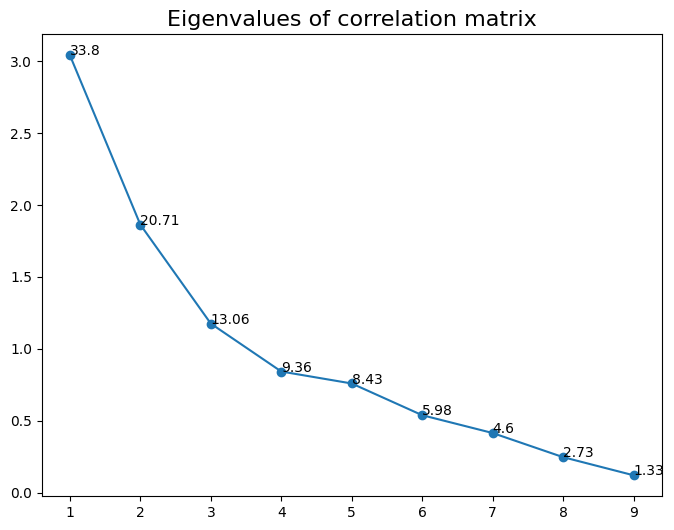

In [16]:
plt.figure(figsize=(8, 6)) #создали область Figure
plt.title('Eigenvalues of correlation matrix',fontsize=16)
plt.plot(df['number'], df['eig'], marker='o')
#plot рисует точки, соединенные линиями, df - датафрейм из прошлого блока кода
ax = plt.gca()
#используется для получения текущего экземпляра Axes на текущей фигуре, axes- непосредственно область построения
df.apply(lambda x: ax.annotate(x['variance_share, %'], (x['number'], x['eig'])), axis=1)
#применение функции к каждой строке, annotate добавляет аннотацию на координатную плоскость в координаты (x, y)
plt.show()

## Вклады главных компонент в суммарную дисперсию исходных признаков

In [17]:
print("Вклады главных компонент в суммарную дисперсию исходных признаков")
result = pd.concat([df, np.cumsum(df[['eig', 'variance_share, %']])], axis=1)
#concat соединяет пересекающиеся данные для заполнения недостающих значений в структуре,
#cumsum () возвращает кумулятивную (накапливаемую) сумму элементов массива
result.columns = list(df.columns) + ['cum_eig', 'cum_variance_share, %']
result

Вклады главных компонент в суммарную дисперсию исходных признаков


,eig,number,"variance_share, %",cum_eig,"cum_variance_share, %"
0,3.042303,1,33.80,3.042303,33.80
1,1.863591,2,20.71,4.905894,54.51
2,1.175385,3,13.06,6.081279,67.57
3,0.841970,4,9.36,6.923248,76.93
4,0.758647,5,8.43,7.681895,85.36
5,0.538071,6,5.98,8.219966,91.34
6,0.413990,7,4.60,8.633955,95.94
7,0.246087,8,2.73,8.880042,98.67
8,0.119958,9,1.33,9.000000,100.00


## Матрица главных компонент U

In [18]:
# Коэффициенты линейного преобразования центрировано-нормированных исходных признаков
u = np.empty((f_len, f_len))  #матрица U главных компонент
for i in range(f_len):
    u[i] = couple_lst[i][1]  #достаем главные компоненты
    #print(u[i])
    #u[i] - собственные вектора корреляционный матрицы
# Создадим фрейм
u = pd.DataFrame(
    data=u.T,
    columns=['Factor_' + str(i+1) for i in range(f_len)],
    index=features
)
u

,Factor_1,Factor_2,Factor_3,Factor_4,Factor_5,Factor_6,Factor_7,Factor_8,Factor_9
X1,-0.173729,-0.552363,-0.135629,-0.325780,0.144517,-0.160303,0.679270,-0.179285,0.007264
X2,-0.426574,-0.322732,0.088281,0.065374,0.205369,0.098317,-0.506612,-0.622722,-0.074363
X3,-0.454008,0.027175,0.106620,-0.200534,0.458737,0.405788,-0.042290,0.500369,0.338075
X4,0.041755,0.001589,0.795322,0.465670,0.159828,0.006484,0.336878,-0.092364,0.035531
X5,-0.231205,-0.278354,-0.360366,0.657916,-0.314693,0.395506,0.159548,0.154296,-0.040332
X6,-0.385207,0.427123,-0.170808,0.159803,-0.133475,-0.349741,0.159991,-0.267655,0.614084
X7,-0.449976,-0.159297,0.150613,0.080807,-0.154417,-0.631150,-0.171018,0.445596,-0.304851
X8,-0.296611,0.541065,-0.169548,0.033681,0.284450,0.100477,0.279475,-0.139828,-0.633027
X9,0.296124,-0.109345,-0.345595,0.408014,0.692351,-0.335770,-0.090861,0.087288,0.080477


## Полная матрица нагрузок

In [19]:
# полная матрица нагрузок
sqrt_l = np.eye(f_len)
for i in range(f_len):
    sqrt_l[i][i] = math.sqrt(eigenvalues_sorted[i])
A = np.dot(u, sqrt_l)
A = pd.DataFrame(
    data=A,
    columns=['Factor_' + str(i+1) for i in range(f_len)],
    index=features
)
A

,Factor_1,Factor_2,Factor_3,Factor_4,Factor_5,Factor_6,Factor_7,Factor_8,Factor_9
X1,-0.303022,-0.754049,-0.147043,-0.298932,0.125874,-0.117587,0.437056,-0.088938,0.002516
X2,-0.744039,-0.440573,0.095710,0.059986,0.178877,0.072118,-0.325964,-0.308915,-0.025756
X3,-0.791890,0.037097,0.115592,-0.184008,0.399561,0.297659,-0.027210,0.248219,0.117092
X4,0.072830,0.002169,0.862250,0.427294,0.139211,0.004756,0.216754,-0.045819,0.012306
X5,-0.403272,-0.379990,-0.390691,0.603697,-0.274099,0.290117,0.102656,0.076542,-0.013969
X6,-0.671885,0.583081,-0.185182,0.146633,-0.116257,-0.256547,0.102941,-0.132776,0.212687
X7,-0.784858,-0.217462,0.163287,0.074148,-0.134497,-0.462969,-0.110036,0.221047,-0.105585
X8,-0.517354,0.738626,-0.183816,0.030905,0.247757,0.073704,0.179820,-0.069365,-0.219248
X9,0.516506,-0.149271,-0.374677,0.374389,0.603040,-0.246298,-0.058462,0.043301,0.027873


### Матрица нагрузок A

In [20]:
#возьмем только первые главные компоненты
u1 = u.iloc[:, :pc]

# рассчитаем первые pc для матрицы назгрузок
A1 = A.iloc[:, :pc]
A1

,Factor_1,Factor_2,Factor_3
X1,-0.303022,-0.754049,-0.147043
X2,-0.744039,-0.440573,0.095710
X3,-0.791890,0.037097,0.115592
X4,0.072830,0.002169,0.862250
X5,-0.403272,-0.379990,-0.390691
X6,-0.671885,0.583081,-0.185182
X7,-0.784858,-0.217462,0.163287
X8,-0.517354,0.738626,-0.183816
X9,0.516506,-0.149271,-0.374677


## Матрица индивидуальных значений главных компонент

In [21]:
# Матрица индивидуальных значений главных компонент
# @ - оператор перемноженния матриц
F = (np.linalg.inv(A.T @ A) @ A.T @ data.T).T
F = F.iloc[:, :pc] # Берем первые pc главных компонент
F.columns = ['Factor_' + str(i + 1) for i in range(pc)]
F[:85]

,Factor_1,Factor_2,Factor_3
Регион,,,
Алтайский край,0.004159,-1.097483,1.171957
Амурская область,-1.411406,-1.249320,-0.254910
Архангельская область без автономного ок,-0.855245,0.164754,-0.062972
Астраханская область,0.744297,-0.131921,-0.170531
Белгородская область,0.551359,0.065125,-1.304654
...,...,...,...
Чеченская Республика,2.359530,1.888201,0.580749
Чувашская Республика — Чувашия,0.019664,-0.714488,-0.232587
Чукотский автономный округ,-3.295347,3.407731,0.885262


### Сравнить эту матрицу с полученной в STATISTICA
#### Если есть столбцы с обратными знаками, то раскомментировать соответствующую строчку

In [22]:
#раскомментировать, если у вас компоненты с обратными знаками
# F['Factor_1']=F['Factor_1']*(-1)
# F['Factor_2']=F['Factor_2']*(-1)
# F['Factor_3']=F['Factor_3']*(-1)
# F['Factor_4']=F['Factor_4']*(-1)
F

,Factor_1,Factor_2,Factor_3
Регион,,,
Алтайский край,0.004159,-1.097483,1.171957
Амурская область,-1.411406,-1.249320,-0.254910
Архангельская область без автономного ок,-0.855245,0.164754,-0.062972
Астраханская область,0.744297,-0.131921,-0.170531
Белгородская область,0.551359,0.065125,-1.304654
...,...,...,...
Чеченская Республика,2.359530,1.888201,0.580749
Чувашская Республика — Чувашия,0.019664,-0.714488,-0.232587
Чукотский автономный округ,-3.295347,3.407731,0.885262


## Загружаем распределение по классам для метода Уорда и К-средних
### Нужно назвать столбцы в Excel как ward_old и kmeans_old соответственно !!!
### Изменить название екселевского файла в методе read_excel !!!

In [24]:
#загружаем метки классов, полученные на 1 л/р для метода Уорда и К-средних

classes = pd.read_excel('old_cluster.xlsx', engine='openpyxl')
F['ward_old'] = classes.ward_old.values
F['kmeans_old'] = classes.kmeans_old.values
F

,Factor_1,Factor_2,Factor_3,ward_old,kmeans_old
Регион,,,,,
Алтайский край,0.004159,-1.097483,1.171957,5,3
Амурская область,-1.411406,-1.249320,-0.254910,5,5
Архангельская область без автономного ок,-0.855245,0.164754,-0.062972,2,5
Астраханская область,0.744297,-0.131921,-0.170531,2,1
Белгородская область,0.551359,0.065125,-1.304654,4,3
...,...,...,...,...,...
Чеченская Республика,2.359530,1.888201,0.580749,1,4
Чувашская Республика — Чувашия,0.019664,-0.714488,-0.232587,5,3
Чукотский автономный округ,-3.295347,3.407731,0.885262,3,2


### Кластеризируем полученный результат и строим дендрограмму по методу Уорда

In [25]:
#кластеризация
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster import hierarchy

Text(0.5, 1.0, 'ward method')

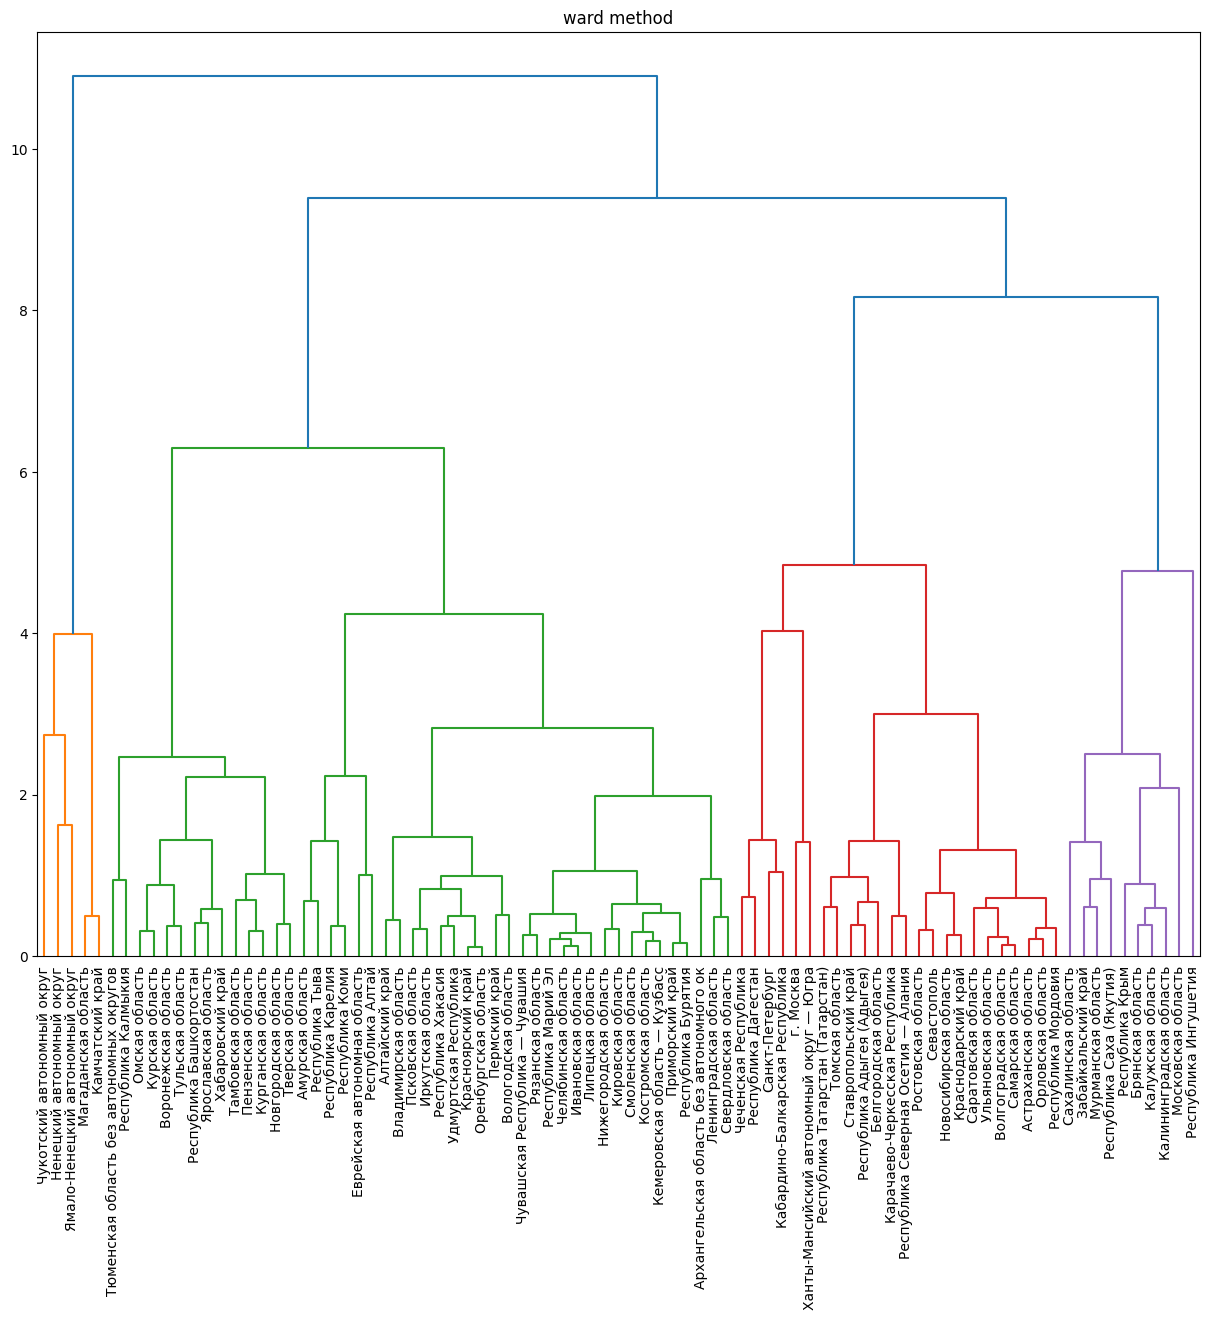

In [26]:
Z = hierarchy.linkage(F.iloc[:, :pc], method='ward', optimal_ordering=True)
    #строим дендрограмму

plt.figure(figsize=(15,12)) #задаем размеры окна с графиками

hierarchy.dendrogram(Z, labels=F.index, leaf_font_size=10)

  #Z - результат кластеризации, labels - названия строк (ось Х), leaf_font_size - размер шрифта

plt.title('{} method'.format('ward'))

### Посчитать количество классов по гистограмме и записать это число в переменную n_clusters

In [27]:
n_clusters = 5 #изменить это значение!
ward = AgglomerativeClustering(n_clusters=n_clusters , linkage='ward')
ward.fit(F.iloc[:, :pc])

kmeans = KMeans(n_clusters=n_clusters , random_state=36)
kmeans.fit(F.iloc[:, :pc])
# т.к. в питоне отсчет с нуля, то +1
F['ward_new'] = ward.labels_+1
F['kmeans_new'] = kmeans.labels_+1
F
# Вывод состава кластеров для алгоритма ward
print("ward")
print(ward.labels_+1)
print("Состав кластеров (Ward):")
for cluster in range(1, n_clusters + 1):
    cluster_members = F[F['ward_new'] == cluster].index  # Доступ к индексам
    print(f"Кластер {cluster}: {', '.join(cluster_members)}")

# Вывод состава кластеров для алгоритма KMeans
print("k-means")
print(kmeans.labels_+1)
print("\nСостав кластеров (KMeans):")
for cluster in range(1, n_clusters + 1):
    cluster_members = F[F['kmeans_new'] == cluster].index  # Доступ к индексам
    print(f"Кластер {cluster}: {', '.join(cluster_members)}")



ward
[3 3 3 1 1 2 3 1 3 5 1 3 2 3 3 1 2 2 4 1 3 3 3 1 3 5 5 3 3 4 2 2 4 3 5 1 5
 3 1 5 3 3 3 1 3 5 3 1 2 5 3 3 2 3 1 2 1 1 3 3 1 3 1 1 1 2 3 1 3 1 5 5 1 5
 5 3 1 5 1 3 1 3 4 4 5]
Состав кластеров (Ward):
Кластер 1: Астраханская область, Белгородская область, Волгоградская область, г. Москва, Кабардино-Балкарская Республика, Карачаево-Черкесская Республика, Краснодарский край, Новосибирская область, Орловская область, Республика Адыгея (Адыгея), Республика Дагестан, Республика Мордовия, Республика Северная Осетия — Алания, Республика Татарстан (Татарстан), Ростовская область, Самарская область, Санкт-Петербург, Саратовская область, Севастополь, Ставропольский край, Томская область, Ульяновская область, Ханты-Мансийский автономный округ — Югра, Чеченская Республика
Кластер 2: Брянская область, Забайкальский край, Калининградская область, Калужская область, Московская область, Мурманская область, Республика Ингушетия, Республика Крым, Республика Саха (Якутия), Сахалинская область
Кластер 

### Построение двумерных графиков по методам Уорда и k-средних (после МГК для переменных Factor 1 и Factor 2)

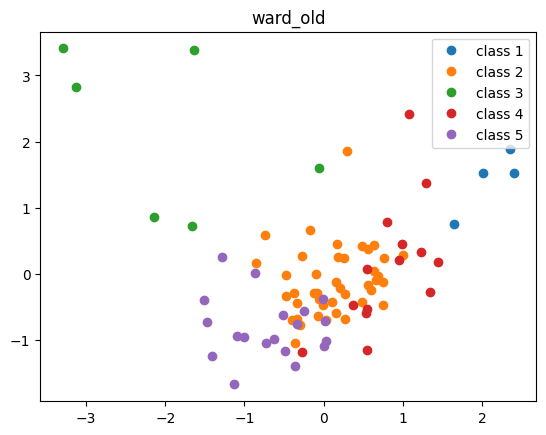

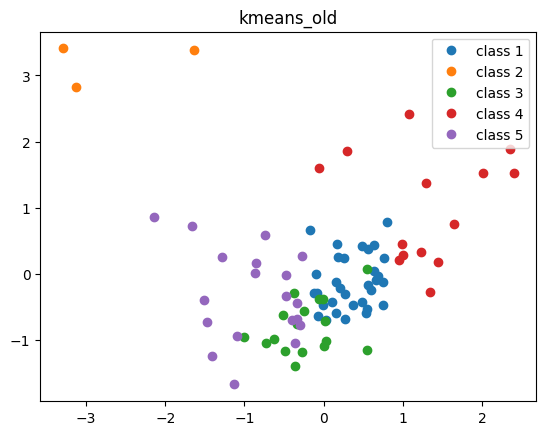

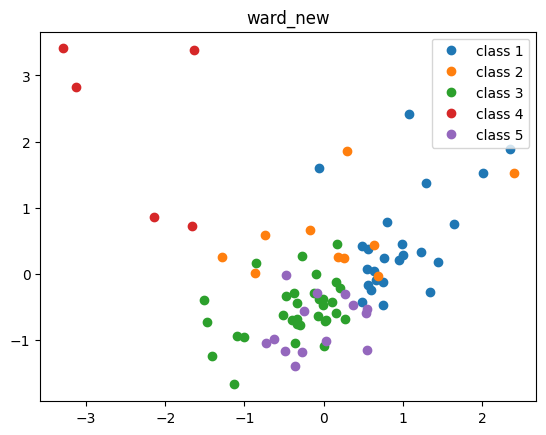

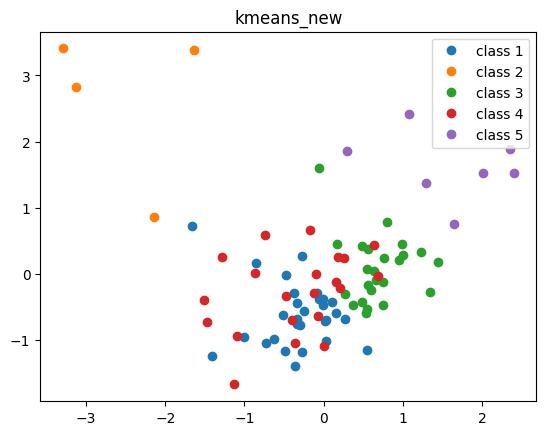

In [28]:
#построение графика по factor 1 и factor 2

for method in ['ward_old', 'kmeans_old', 'ward_new', 'kmeans_new']:
    plt.title(method)
    n_clusters = len(F[method].unique())
    i=1
    while (i <= n_clusters ): # Цикл по меткам классов
        data = F[F[method] == i]
        plt.plot(data.Factor_1, data.Factor_2, 'o', label=f'class {i}')
        i += 1
    plt.legend()
    plt.show()


### Построение двумерных графиков по методам Уорда и k-средних (после МГК для переменных Factor 1 и Factor 3)
#### ТОЛЬКО ДЛЯ 3 ГЛАВНЫХ КОМПОНЕНТ !!!

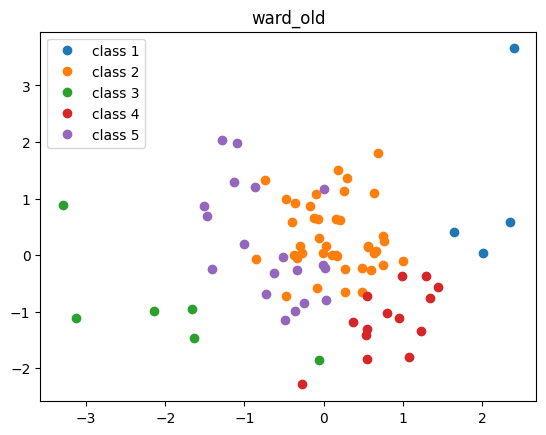

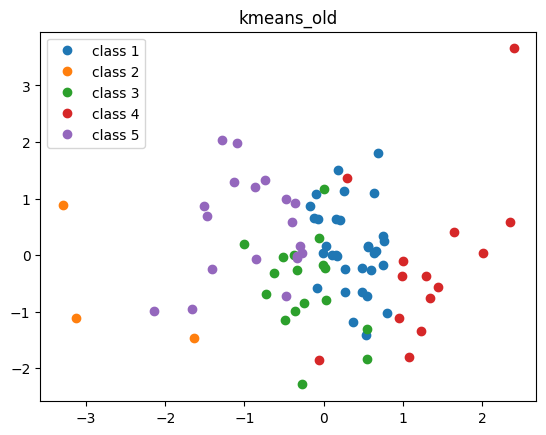

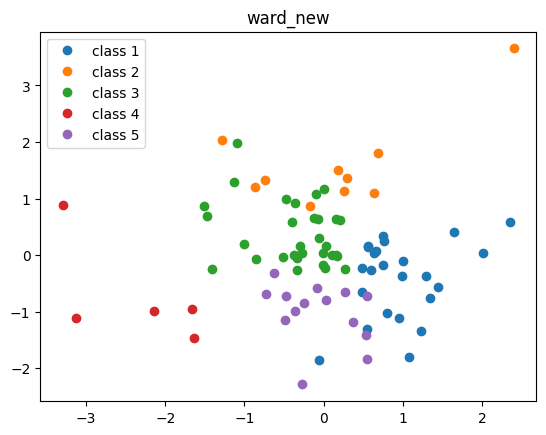

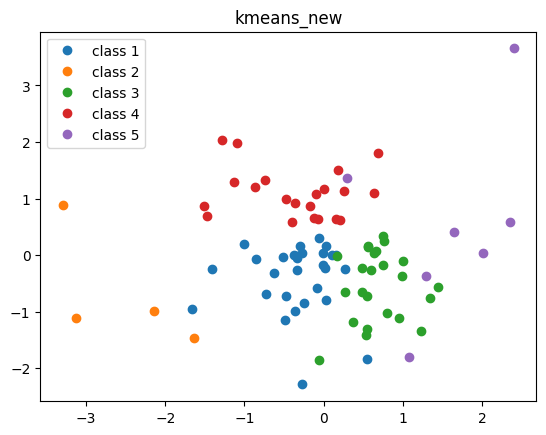

In [29]:
#построение графика

for method in ['ward_old', 'kmeans_old', 'ward_new', 'kmeans_new']:
    plt.title(method)
    n_clusters = len(F[method].unique())
    i=1
    while (i <= n_clusters ): # Цикл по меткам классов
        data = F[F[method] == i]
        plt.plot(data.Factor_1, data.Factor_3, 'o', label=f'class {i}')
        i += 1
    plt.legend()
    plt.show()


### Построение трехмерного графика по методам Уорда и k-средних
#### ТОЛЬКО ДЛЯ 3 ГЛАВНЫХ КОМПОНЕНТ !!!

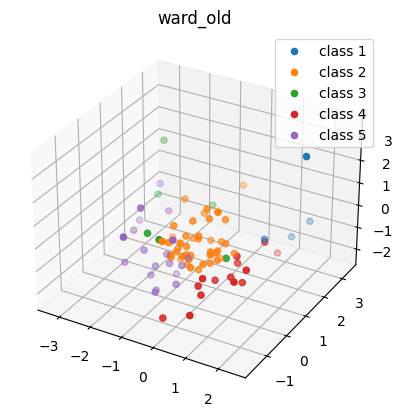

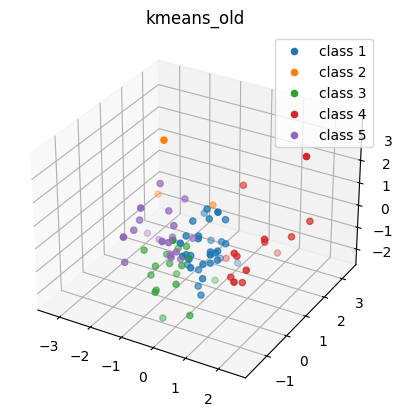

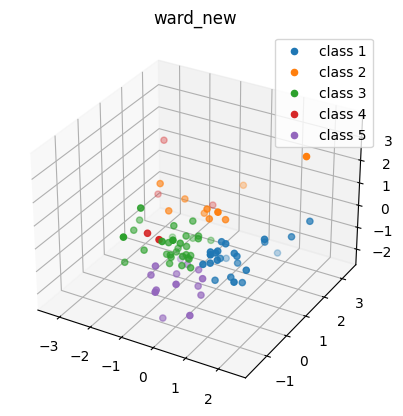

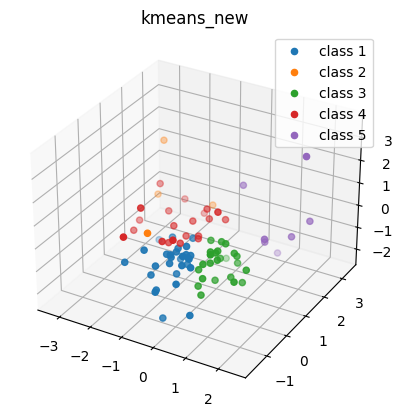

In [30]:
#трёхмерный график
from mpl_toolkits.mplot3d import Axes3D

for method in ['ward_old', 'kmeans_old', 'ward_new', 'kmeans_new']:
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.set_title(method)
    n_clusters = len(F[method].unique())
    i = 1
    while (i <= n_clusters ): # Цикл по меткам классов
        data = F[F[method] == i]
        ax.scatter(data.Factor_1, data.Factor_2, data.Factor_3, 'o', label=f'class {i}')
        i += 1
    plt.legend()
    plt.show()

# label=f'class {i}'

## Выгрузка полученных результатов в екселевский файл

In [31]:
#выгрузка в файл
F.to_excel('Lab3_python.xlsx')

In [32]:
F

,Factor_1,Factor_2,Factor_3,ward_old,kmeans_old,ward_new,kmeans_new
Регион,,,,,,,
Алтайский край,0.004159,-1.097483,1.171957,5,3,3,4
Амурская область,-1.411406,-1.249320,-0.254910,5,5,3,1
Архангельская область без автономного ок,-0.855245,0.164754,-0.062972,2,5,3,1
Астраханская область,0.744297,-0.131921,-0.170531,2,1,1,3
Белгородская область,0.551359,0.065125,-1.304654,4,3,1,3
...,...,...,...,...,...,...,...
Чеченская Республика,2.359530,1.888201,0.580749,1,4,1,5
Чувашская Республика — Чувашия,0.019664,-0.714488,-0.232587,5,3,3,1
Чукотский автономный округ,-3.295347,3.407731,0.885262,3,2,4,2
